# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


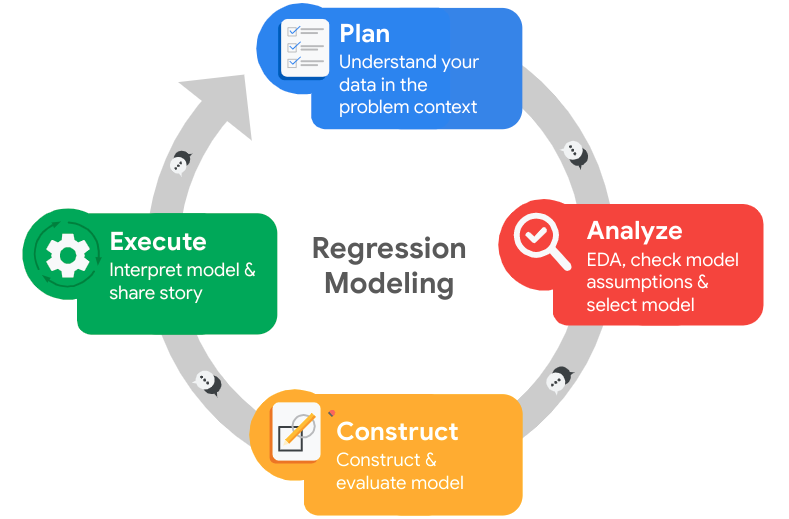

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
                            f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident':'work_accident',
                          'time_spend_company': 'tenure', 
                          'average_montly_hours':'average_monthly_hours', 
                          'Department':'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The above output shows the first five occurences of rows that are duplicated farther down in the dataframe. How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response for every column?

You could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary. With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. You can proceed by dropping them.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
display(df1.duplicated().sum())
display(df1.head())

0

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

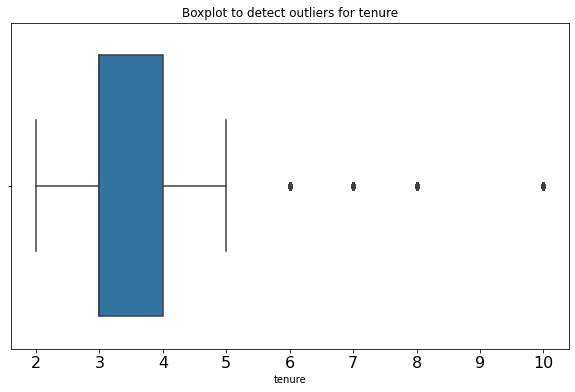

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
q1 = df1['tenure'].quantile(0.25)
q3 = df1['tenure'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
print('Upper limit: ', upper_limit)
print('Lower limit: ', lower_limit)

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
print("Outliern in tenure are : ", len(outliers))

Upper limit:  5.5
Lower limit:  1.5
Outliern in tenure are :  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df1['left'].value_counts()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df1['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

You could start by creating a stacked boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed versus those who left.

Box plots are very useful in visualizing distributions within data, but they can be deceiving without the context of how big the sample sizes that they represent are. So, you could also plot a stacked histogram to visualize the distribution of `number_project` for those who stayed and those who left.

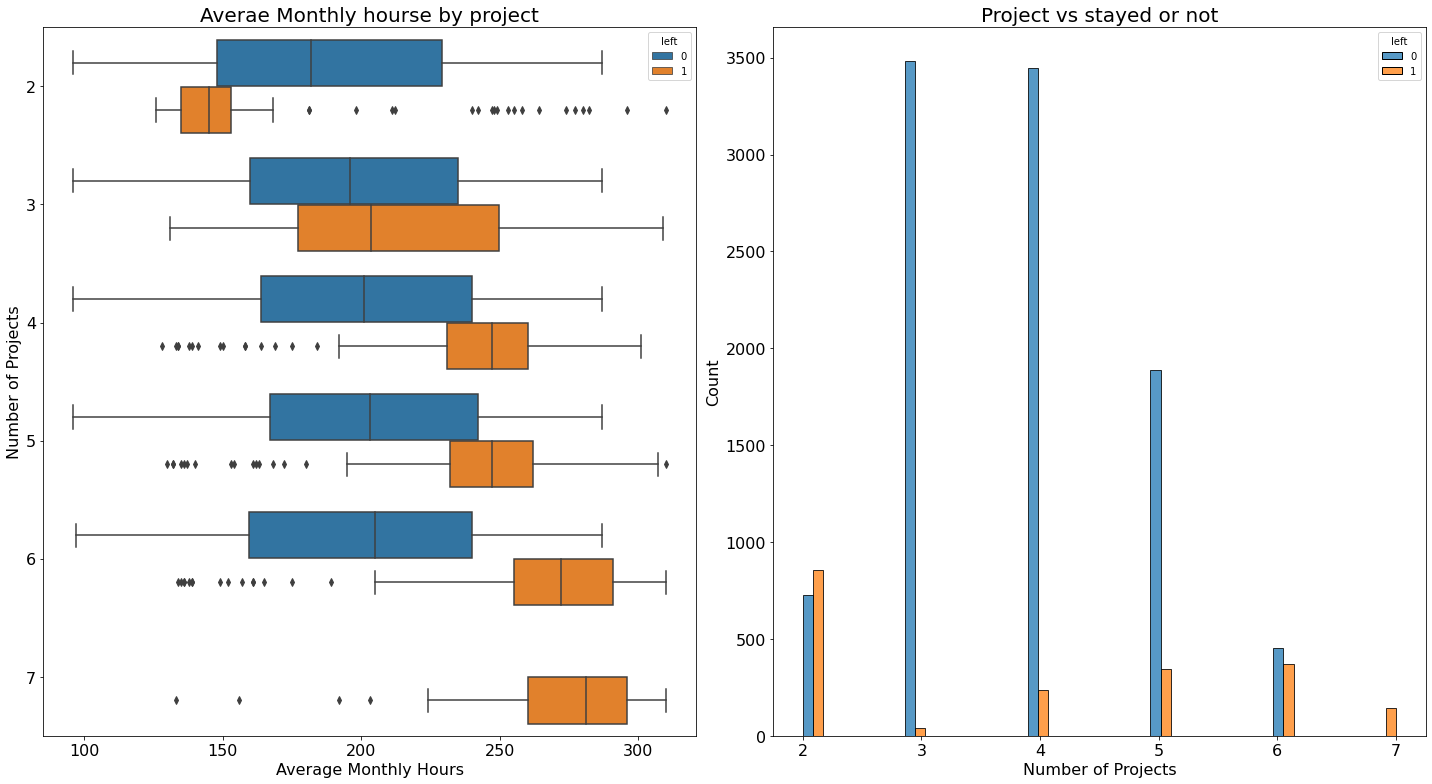

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###


fig, ax = plt.subplots(1, 2, figsize=(20,11))

# boxplot with average_monthly_hours and  number_project they had with rspect to of they stayed or not
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h",ax=ax[0])
ax[0].set_title("Averae Monthly hourse by project", fontsize='20')
ax[0].set_xlabel("Average Monthly Hours", fontsize=16)
ax[0].set_ylabel("Number of Projects", fontsize=16)
ax[0].tick_params(axis='x', labelsize=16)
ax[0].tick_params(axis='y', labelsize=16)

# a histogram having the the number of project if he stayed or not
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', ax=ax[1])
ax[1].set_title("Project vs stayed or not", fontsize='20')
ax[1].set_xlabel("Number of Projects", fontsize=16)
ax[1].set_ylabel("Count", fontsize=16)
ax[1].tick_params(axis='x', labelsize=16)
ax[1].tick_params(axis='y', labelsize=16)

plt.tight_layout()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

As the next step, you could confirm that all employees with seven projects left.

In [15]:
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

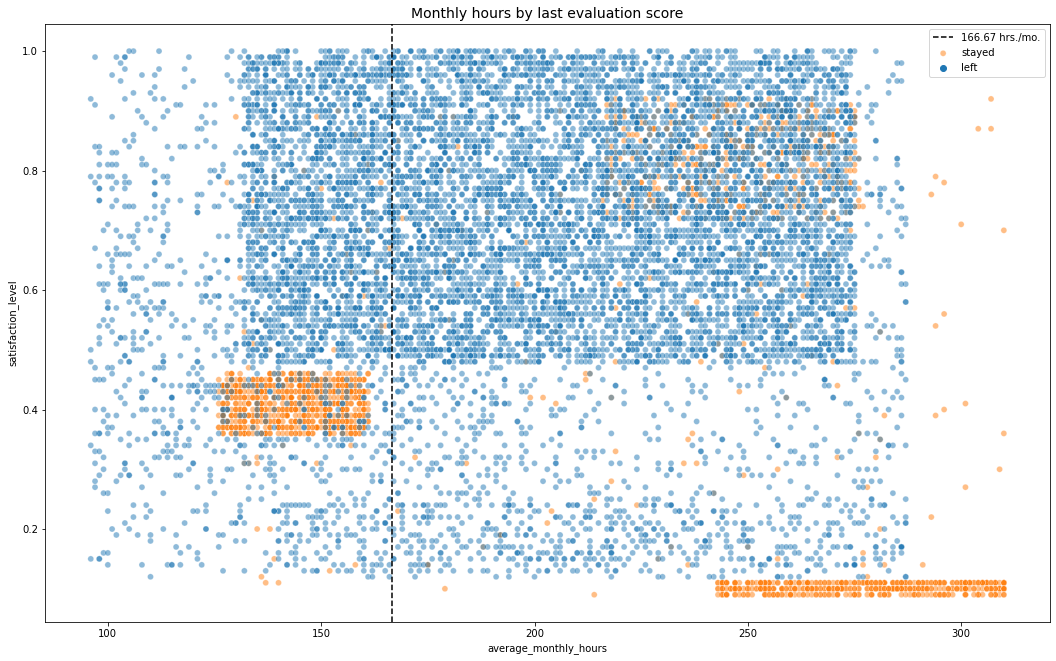

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(18, 11))
sns.scatterplot(x='average_monthly_hours', y='satisfaction_level', hue='left', data=df1, alpha=0.5)
plt.axvline(x= 166.67, color='black', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by last evaluation score', fontsize='14');
plt.show()

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. 


For the next visualization, it might be interesting to visualize satisfaction levels by tenure.

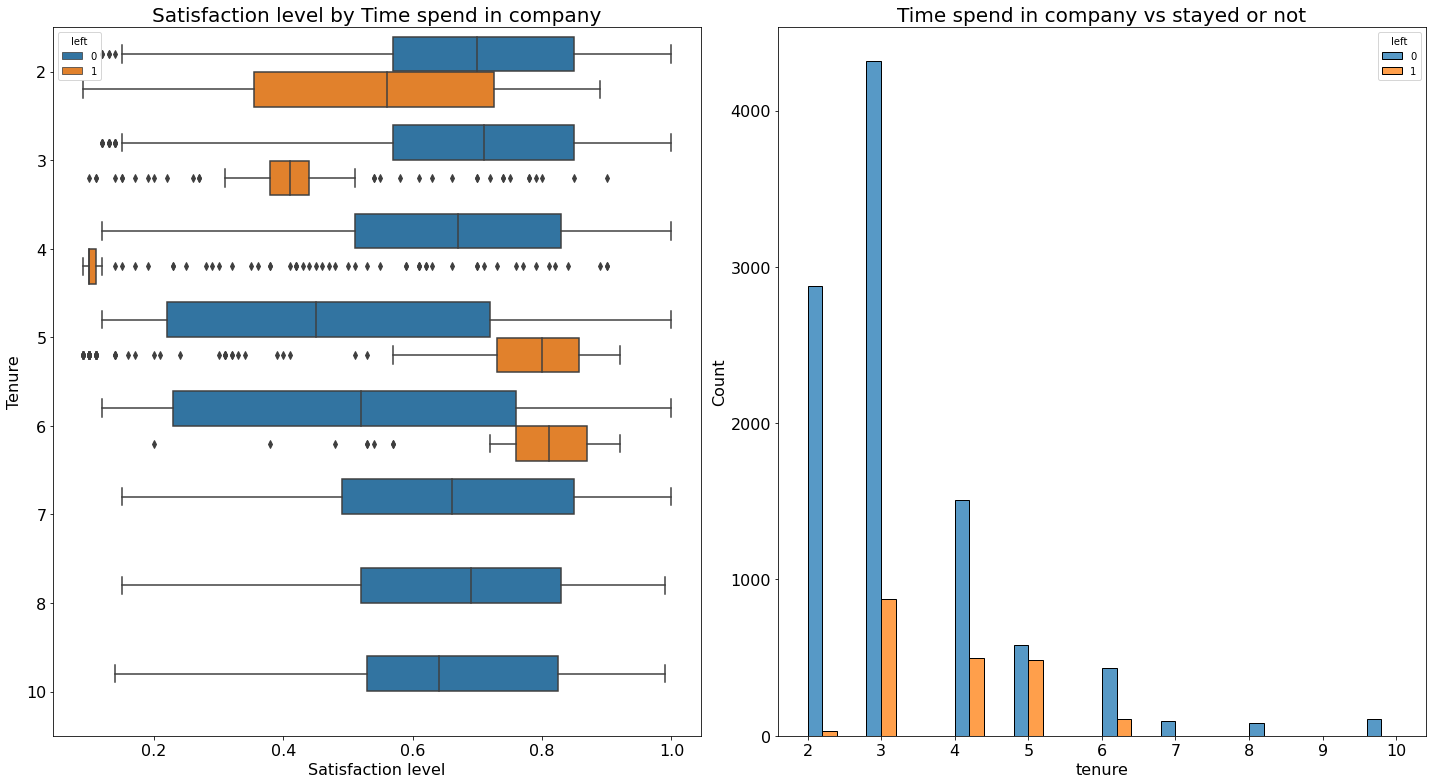

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(20,11))

# boxplot with average_monthly_hours and  number_project they had with rspect to of they stayed or not
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h",ax=ax[0])
ax[0].set_title("Satisfaction level by Time spend in company", fontsize='20')
ax[0].set_xlabel("Satisfaction level", fontsize=16)
ax[0].set_ylabel("Tenure", fontsize=16)
ax[0].tick_params(axis='x', labelsize=16)
ax[0].tick_params(axis='y', labelsize=16)

# a histogram having the the number of project if he stayed or not
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', ax=ax[1], bins=20)
ax[1].set_title("Time spend in company vs stayed or not", fontsize='20')
ax[1].set_xlabel("tenure", fontsize=16)
ax[1].set_ylabel("Count", fontsize=16)
ax[1].tick_params(axis='x', labelsize=16)
ax[1].tick_params(axis='y', labelsize=16)

plt.tight_layout()

There are many observations you could make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [18]:
df1.groupby('left')[['satisfaction_level']].agg({np.mean, np.median})

satisfaction_level          
                 median      mean
left                             
0                  0.69  0.667365
1                  0.41  0.440271

As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left. 

Next, you could examine salary levels for different tenures.

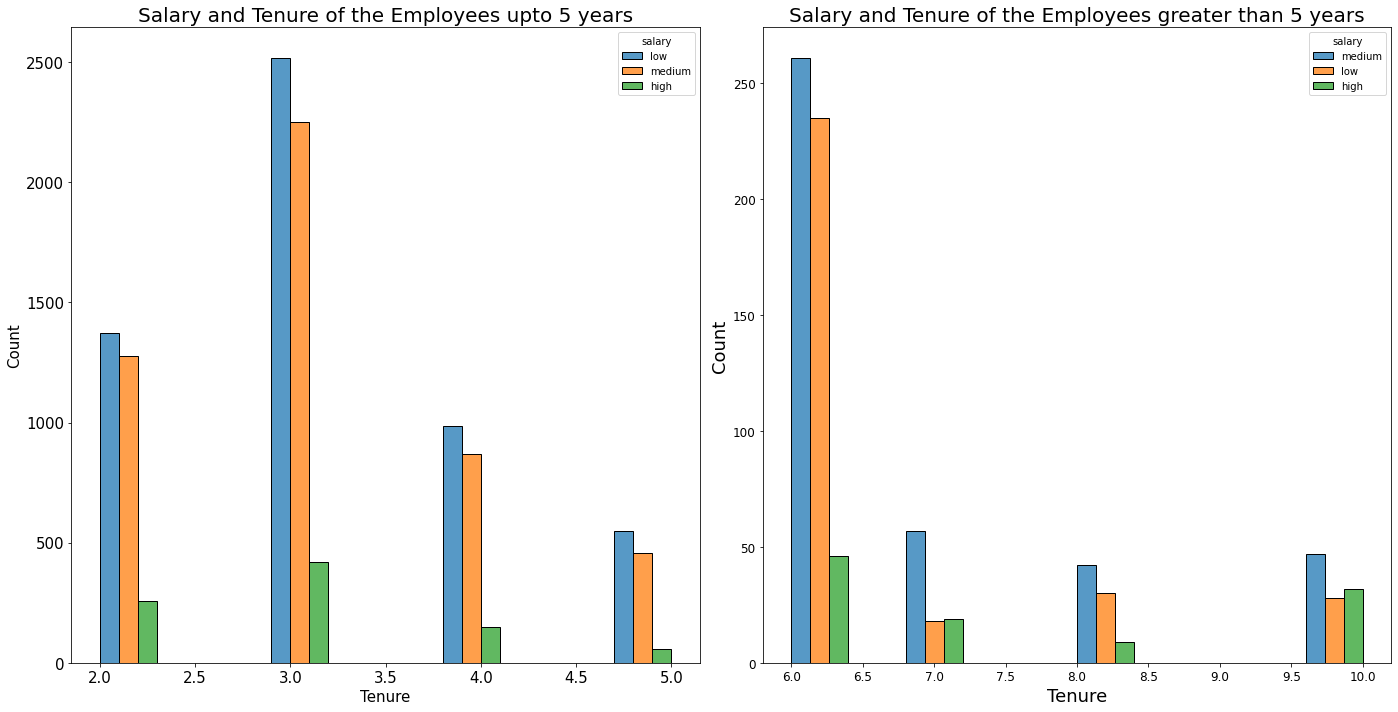

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,2,figsize=(20,10))

tenure_small = df1[df1['tenure'] < 6]
tenure_high = df1[df1['tenure'] >= 6]

sns.histplot(x='tenure', hue='salary', data=tenure_small, multiple='dodge', bins=10, ax=ax[0])
ax[0].set_title("Salary and Tenure of the Employees upto 5 years", fontsize=20)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].set_xlabel("Tenure",fontsize=15)
ax[0].set_ylabel("Count",fontsize=15)

sns.histplot(x='tenure', hue='salary', data=tenure_high, multiple='dodge', bins=10, ax=ax[1])
ax[1].set_title("Salary and Tenure of the Employees greater than 5 years", fontsize=20)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].set_xlabel("Tenure",fontsize=18)
ax[1].set_ylabel("Count",fontsize=18)

plt.tight_layout()

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

Next, you could explore whether there's a correlation between working long hours and receiving high evaluation scores. You could create a scatterplot of `average_monthly_hours` versus `last_evaluation`.

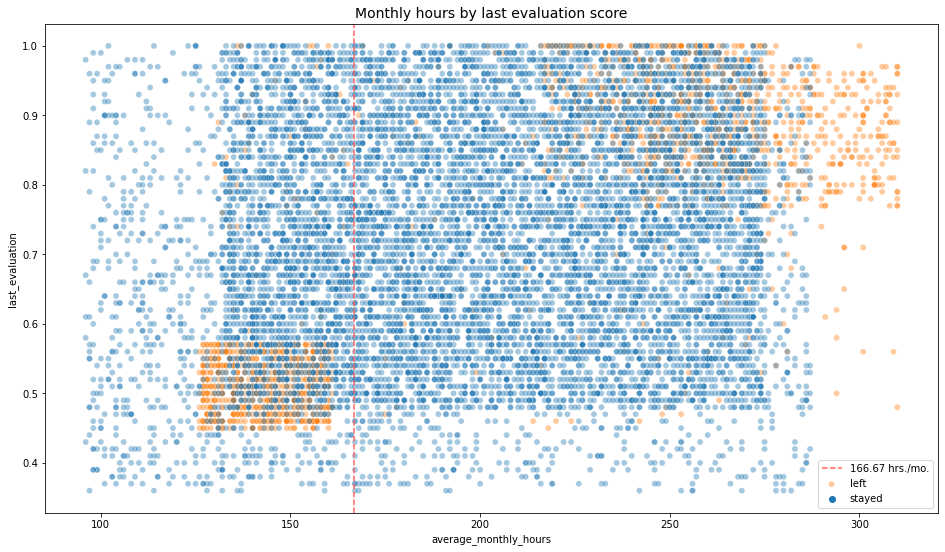

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, you could examine whether employees who worked very long hours were promoted in the last five years

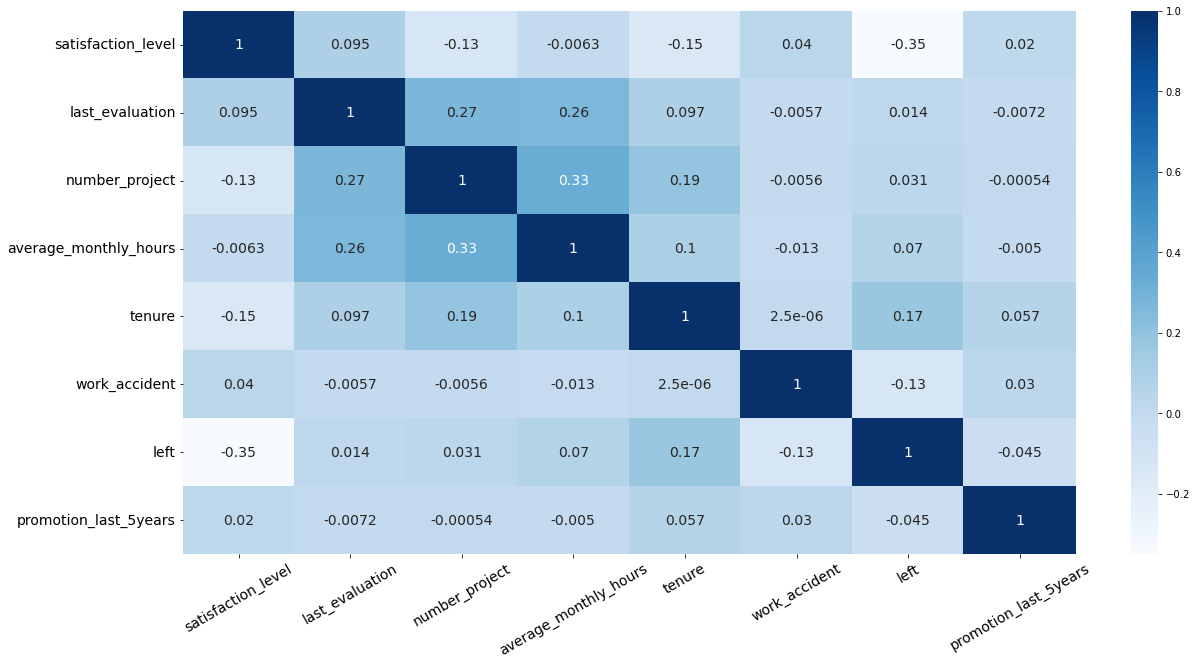

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot=True, cmap='Blues', annot_kws={'size':14})
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=14)
plt.show()

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

So basicaly our task here is to predict whether the employee will churn or not. it basically this is a classification problem.  More specifically a binary classisfication probelm when the column `left` is 1 it means the Emploee is churned and 0 then stayed.  

### Identify the types of models most appropriate for this task.

Sincle this is a Classification probelm, and most importantly since it met all the assumtions of logistic regression, whe can use that. we can also use tree based classisfication problem to train the data so that we can get a broder understanding of which model perform best and can chose that

### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.



#### Logistic regression


Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [22]:
### YOUR CODE HERE ###
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
) 

# Dummy encode the `department` colum
df_enc = pd.get_dummies(df_enc, drop_first=True)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


Text(0.5, 1.0, 'Heatmap of correlation of varialbles')

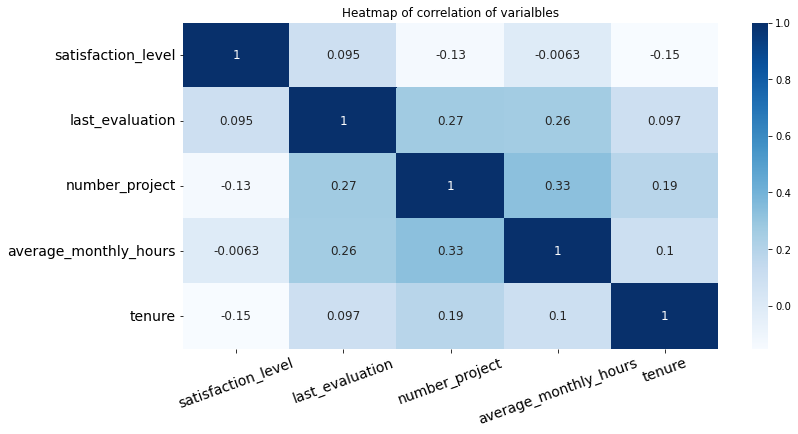

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(
    df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), 
    annot=True, 
    cmap='Blues', 
    annot_kws={'size':12}
)
plt.xticks(fontsize=14, rotation=20)
plt.yticks(fontsize=14)
plt.title("Heatmap of correlation of varialbles")

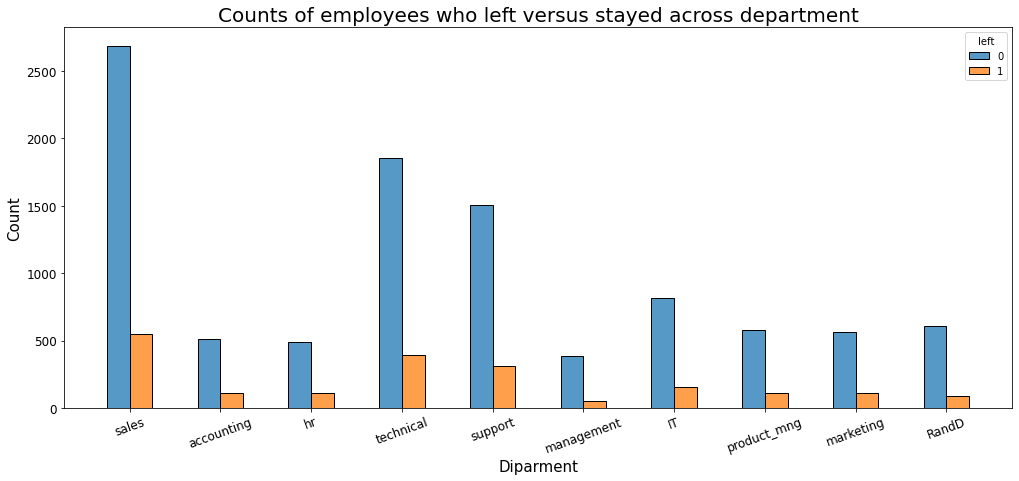

In [24]:
plt.figure(figsize=(17,7))

ax=sns.histplot(x='department', data=df1, hue='left', multiple='dodge', shrink=0.5)
ax.set_xlabel("Diparment", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
ax.tick_params(axis='x', labelsize=12, rotation=20)
ax.tick_params(axis='y', labelsize=12)
ax.set_title("Counts of employees who left versus stayed across department", fontsize=20)

plt.show()

In [25]:
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [26]:
# Target variable

y = df_logreg['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [27]:
# Predictor variables
X = df_logreg.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [29]:
%%time
#  Train and fit model 
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

CPU times: user 18.5 s, sys: 26.8 s, total: 45.3 s
Wall time: 22.7 s


<Figure size 864x504 with 0 Axes>

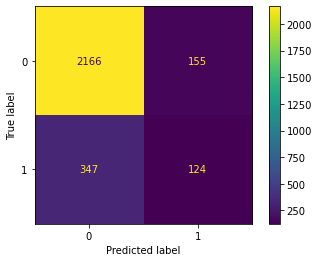

In [30]:
# Predict value and 
y_pred = log_clf.predict(X_test)

# Confusion matrix
plt.figure(figsize=(12,7))
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
log_disp= ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
log_disp.plot(values_format='')

plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Check the class balance in the data. In other words, check the value counts in the `left` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [31]:
# Create classification report for logistic regression model
target_names = ['not leave', 'leave']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not leave       0.86      0.93      0.90      2321
       leave       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

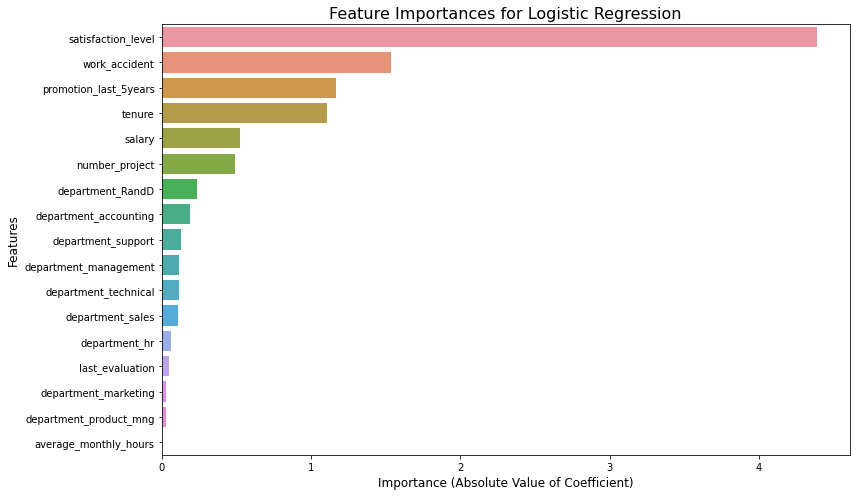

In [32]:
# Feature importance grpah
plt.figure(figsize=(12,7))
importance_log = log_clf.coef_[0]
feature_name_log = X.columns

feature_imp_log = pd.Series(data=importance_log, index=feature_name_log)
feat_imp_sorted = feature_imp_log.abs().sort_values(ascending=False)

ax = sns.barplot(x=feat_imp_sorted.values, y=feat_imp_sorted.index)

ax.set_title("Feature Importances for Logistic Regression", fontsize=16)
ax.set_xlabel("Importance (Absolute Value of Coefficient)", fontsize=12)
ax.set_ylabel("Features", fontsize=12)

plt.tight_layout()
plt.show()

In [33]:
y_pred_proba = log_clf.predict_proba(X_test)[:, 1]

log_test_results = pd.DataFrame(
    data={
        'model': ['logistic regression'],
        'precision': [precision_score(y_test, y_pred)],
        'recall': [recall_score(y_test, y_pred)],
        'f1': [f1_score(y_test, y_pred)],
        'accuracy': [accuracy_score(y_test, y_pred)],
        'auc': [roc_auc_score(y_test, y_pred_proba)]
    }
)


log_test_results

,model,precision,recall,f1,accuracy,auc
0,logistic regression,0.444444,0.26327,0.330667,0.820201,0.882701


### Modeling Approach B: Tree-based Model

This approach covers implementation of Decison tree and random forest



In [34]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [35]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Round 1

Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [37]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [38]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.42 s, sys: 347 ms, total: 2.77 s
Wall time: 2.77 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [39]:
print("Best parameter: ", tree1.best_params_)
print("Best Score(auc)", tree1.best_score_)

Best parameter:  {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Score(auc) 0.969819392792457


In [40]:
def make_results(model_name:str, model_object, metrics:str):
    metric_dict = {
        'auc': 'mean_test_roc_auc',
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall',
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy'
    }
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metrics]].idxmax(), :]
    
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    table = pd.DataFrame()
    table = pd.DataFrame({
        'model': [model_name],
        'precision':[precision],
        'recall': [recall],
        'f1': [f1],
        'accuracy': [accuracy],
        'auc': [auc]
    })
    
    return table

In [41]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,f1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


In [42]:
model_scores = pd.concat([log_test_results, tree1_cv_results])
model_scores

,model,precision,recall,f1,accuracy,auc
0,logistic regression,0.444444,0.263270,0.330667,0.820201,0.882701
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


All of these scores from the decision tree model are strong indicators of good model performance. 

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.

#### Random forest - Round 1

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)

cv_params = {
        'max_depth': [3,5, None], 
        'max_features': [1.0],
        'max_samples': [0.7, 1.0],
        'min_samples_leaf': [1,2,3],
        'min_samples_split': [2,3,4],
        'n_estimators': [300, 500],
}  
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rf, cv_params, scoring, cv=4, refit='roc_auc')

In [44]:
# %%time
# rf1.fit(X_train, y_train)

CPU times: user 8min 54s, sys: 8.73 s, total: 9min 3s
Wall time: 9min 3s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [45]:
#download the file with pickle
path = '/home/jovyan/work/'

def write_pickle(path, model_object, file_name:str):
    with open(path + file_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        
def read_pickle(path, model_name:str):
    with open(path + model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
        
    return model

In [46]:
# write pickle
write_pickle(path, rf1, 'hr_rf1')

In [47]:
# read pickle
rf1 = read_pickle(path, 'hr_rf1')

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [48]:
# check best score
rf1.best_score_

0.9803963087745455

In [49]:
# best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [50]:
# get all cv scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
rf1_cv_results

,model,precision,recall,f1,accuracy,auc
0,random forest cv,0.948704,0.915614,0.931836,0.977761,0.980396


In [51]:
model_scores = pd.concat([log_test_results, tree1_cv_results,rf1_cv_results])
model_scores

,model,precision,recall,f1,accuracy,auc
0,logistic regression,0.444444,0.263270,0.330667,0.820201,0.882701
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819
0,random forest cv,0.948704,0.915614,0.931836,0.977761,0.980396


The evaluation scores of the random forest model are better than those of the decision tree model and logistic model, with the exception of recall (the recall score of the random forest model is approximately 0.001 lower, which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model.

Next, you can evaluate the final model on the test set.

In [52]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
  
    return table

# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
print(rf1_test_scores)

model_scores = pd.concat([log_test_results, tree1_cv_results, rf1_cv_results, rf1_test_scores])
display(model_scores)

                 model  precision    recall        f1  accuracy       auc
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439


,model,precision,recall,f1,accuracy,auc
0,logistic regression,0.444444,0.263270,0.330667,0.820201,0.882701
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819
0,random forest cv,0.948704,0.915614,0.931836,0.977761,0.980396
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


#### Feature Engineering

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

You could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`. It will be a binary variable.

In [53]:
df2 = df_enc.drop('satisfaction_level', axis=1)

df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [56]:
# creating new column `overworked` 
max_time = df2['average_monthly_hours'].max()
min_time = df2['average_monthly_hours'].min()
print(max_time)
print(min_time)

df2['overworked'] = np.where(df2['average_monthly_hours'] > 175, 1,0).astype(int)

df2 = df2.drop('average_monthly_hours', axis=1)

df2.head()

310
96


,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [67]:
# again seperae out target and predextor variable
y = df2['left']

X = df2.drop('left', axis=1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [69]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [70]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.2 s, sys: 7.45 ms, total: 2.21 s
Wall time: 2.21 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [71]:
print(tree2.best_score_)
print(tree2.best_params_)

0.9594361127439034
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}


In [72]:
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
display(tree1_cv_results)
display(tree2_cv_results)

,model,precision,recall,f1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


,model,precision,recall,f1,accuracy,auc
0,decision tree2 cv,0.856693,0.903553,0.878882,0.958523,0.959436


#### Random forest - Round 2

In [76]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {
        'max_depth': [3,5, None], 
        'max_features': [1.0],
        'max_samples': [0.7, 1.0],
        'min_samples_leaf': [1,2,3],
        'min_samples_split': [2,3,4],
        'n_estimators': [300, 500],
}  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [77]:
%%time
rf2.fit(X_train, y_train)

CPU times: user 6min 49s, sys: 1.89 s, total: 6min 51s
Wall time: 6min 51s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [78]:
# write pickle
write_pickle(path, rf2, 'hr_rf2')

In [79]:
# Read pickle
rf2 = read_pickle(path, 'hr_rf2')

In [80]:
print("best params: ",rf2.best_params_)
print("best Score: ",rf2.best_score_)

best params:  {'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}
best Score:  0.9649004281897989


In [81]:
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
display(tree2_cv_results)
display(rf2_cv_results)

,model,precision,recall,f1,accuracy,auc
0,decision tree2 cv,0.856693,0.903553,0.878882,0.958523,0.959436


,model,precision,recall,f1,accuracy,auc
0,random forest2 cv,0.867692,0.876747,0.871905,0.9573,0.9649


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric. 

Score the champion model on the test set now.

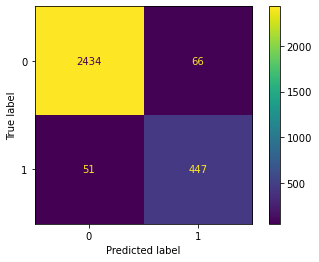

In [82]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features in the random forest model. 

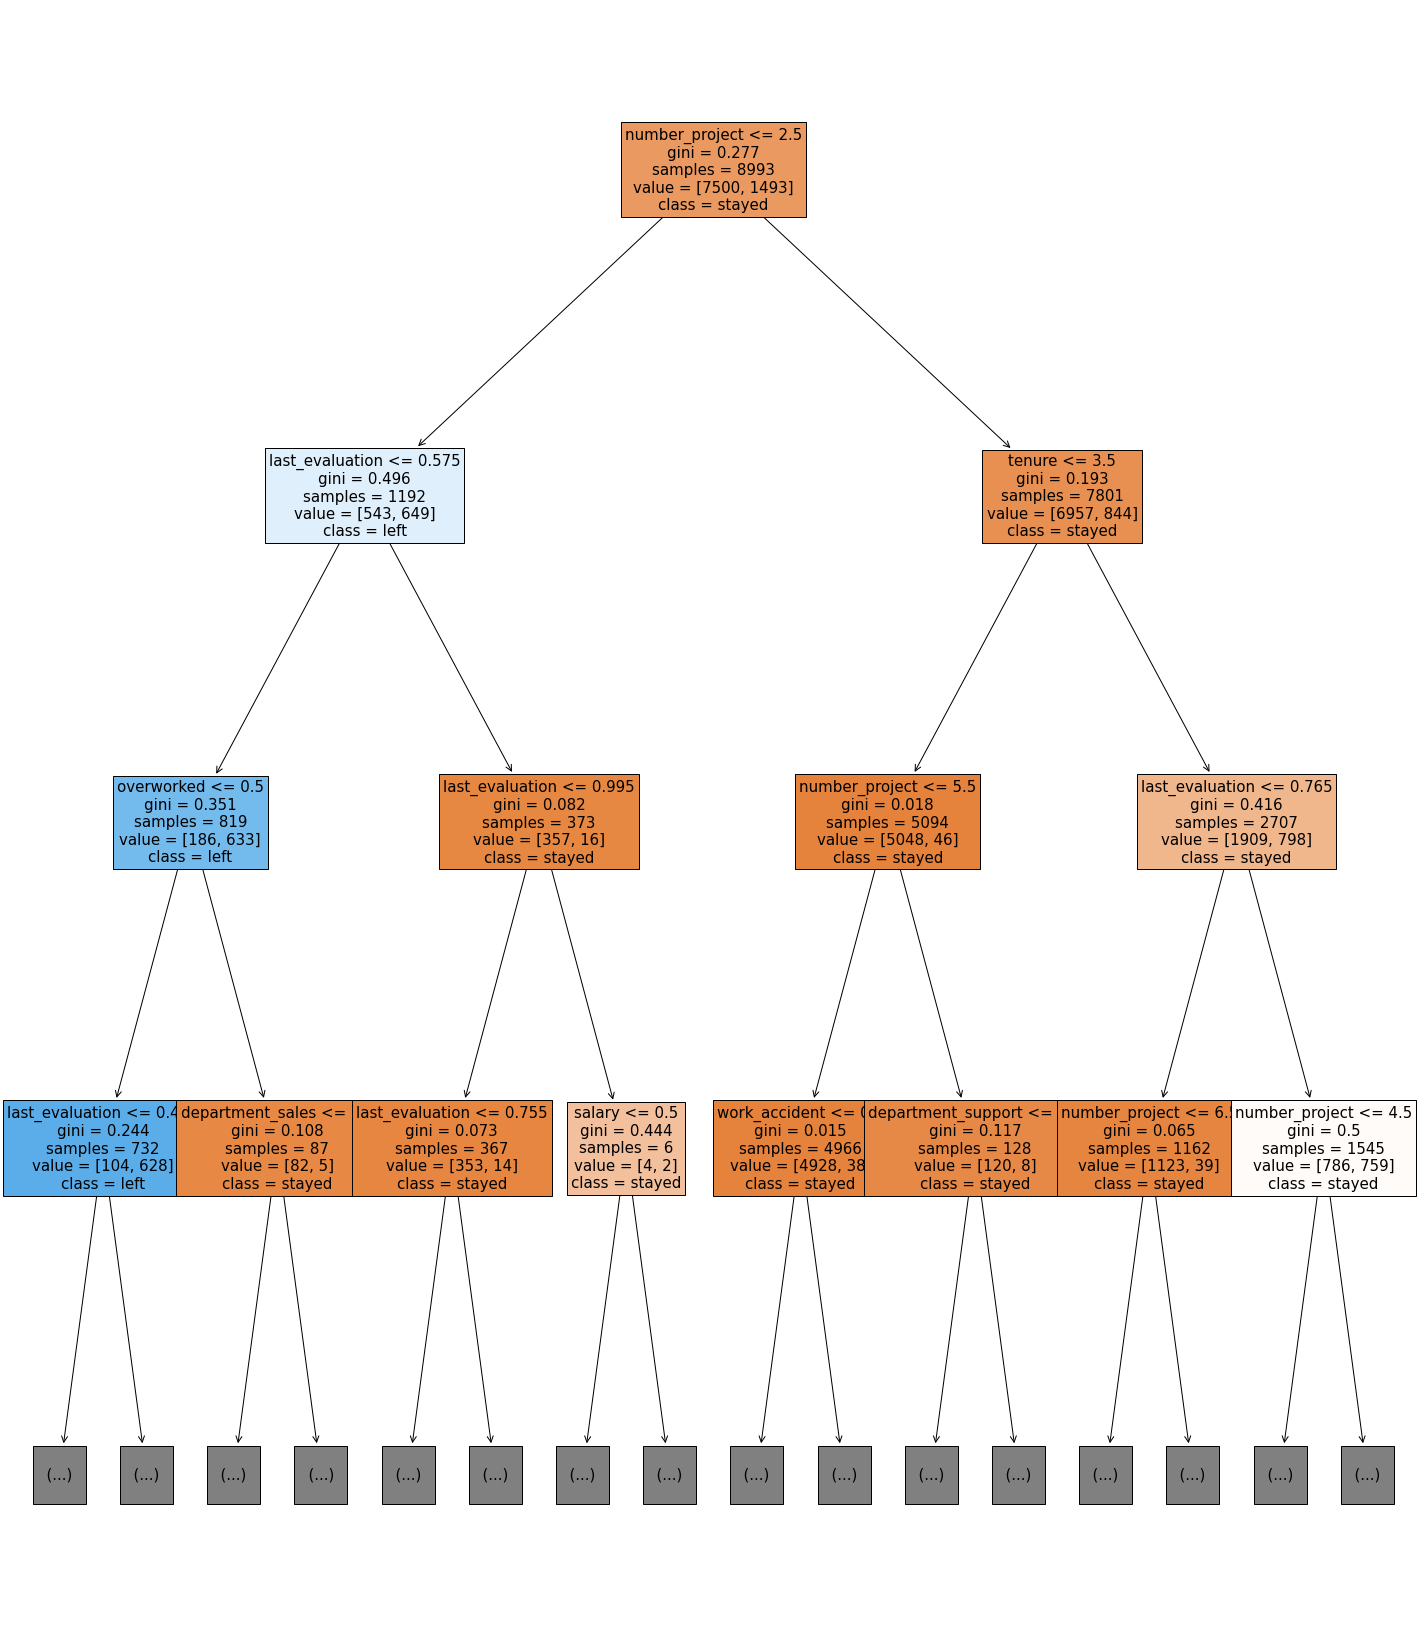

In [93]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,30))

plot_tree(
    tree2.best_estimator_,
    max_depth=3,
    fontsize=15,
    feature_names=X.columns,
    class_names={0:'stayed', 1:'left'},
    filled=True
);
           
plt.show()

#### Decision tree feature importance


In [95]:
tree2_importances = pd.DataFrame(
    tree2.best_estimator_.feature_importances_,
    columns=['gini_importance'],
    index=X.columns
)

tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.344043
number_project,0.343470
tenure,0.215627
overworked,0.093521
department_support,0.001142
salary,0.000911
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_marketing,0.000078


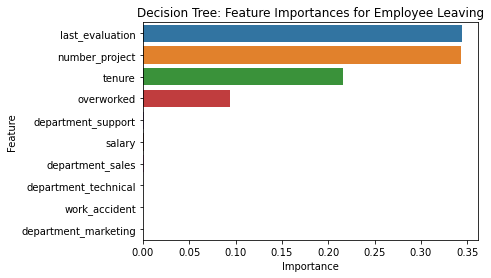

In [97]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

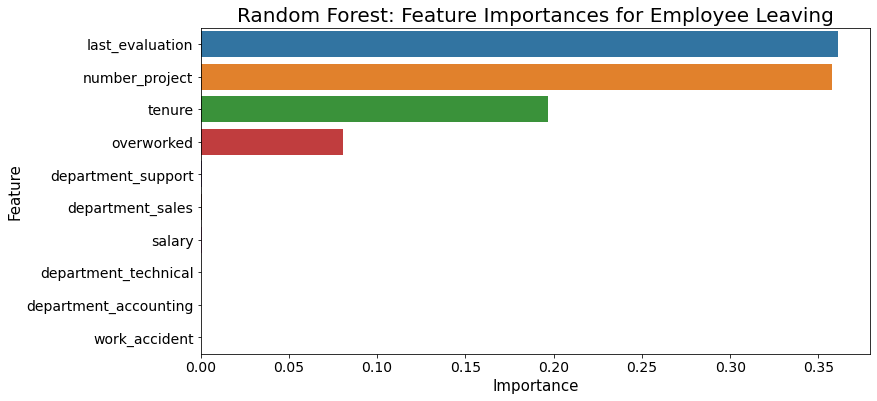

In [109]:
# Random Forest: Feature Importances for Employee Leaving

feat_imp = rf2.best_estimator_.feature_importances_
feat = X.columns
feat_imp_rf2 = pd.DataFrame({'feature': feat, 'importance': feat_imp}).sort_values(by='importance', ascending=False).head(10)

plt.figure(figsize=(12,6))

sx = sns.barplot(x='importance', y='feature', data=feat_imp_rf2, orient='h')

sx.set_title('Random Forest: Feature Importances for Employee Leaving', fontsize=20)
sx.tick_params(axis='x', labelsize=14)
sx.tick_params(axis='y', labelsize=14)
sx.set_xlabel("Importance", fontsize=15)
sx.set_ylabel("Feature", fontsize=15)

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.